<a href="https://colab.research.google.com/github/Nishtha096/Nishtha096/blob/main/Data_Exploration_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data set contains the data regarding several taxi trips and its duration in New York City. I will now try and apply different techniques of Data Analysis to get insights about the data and determine how different variables  such as **TOTAL_AMOUNT** (dependent variable) are dependent on the target variable **Trip Distance and PASSENGER_COUNT**

We read the dataset into the DataFrame df and will have a look at the shape , columns , column data types and the first 5 rows of the data. This will give a brief overview of the data at hand.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()
PATH = 'My Drive/data_exploration/yellow_tripdata_2019-02.csv'
df = pd.read_csv(PATH)
print(df)

         VendorID tpep_pickup_datetime  ... total_amount  congestion_surcharge
0               1  2019-02-01 00:59:04  ...         12.3                   0.0
1               1  2019-02-01 00:33:09  ...         33.3                   0.0
2               1  2019-02-01 00:09:03  ...          3.8                   0.0
3               1  2019-02-01 00:45:38  ...          6.8                   0.0
4               1  2019-02-01 00:25:30  ...          6.3                   0.0
...           ...                  ...  ...          ...                   ...
7019370         2  2019-02-28 23:29:08  ...          0.0                   0.0
7019371         2  2019-02-28 22:48:47  ...          0.0                   2.5
7019372         2  2019-02-28 23:41:23  ...          0.0                   0.0
7019373         2  2019-02-28 23:12:52  ...          0.0                   0.0
7019374         2  2019-02-28 23:10:35  ...          0.0                   0.0

[7019375 rows x 18 columns]


From the data frame we observe that,the rows are trips and columns are the features related to each trip.

In [ ]:
df.head()  #gives the first five rows of data set with all entries/information

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-02-01 00:59:04,2019-02-01 01:07:27,1,2.1,1,N,48,234,1,9.0,0.5,0.5,2.0,0.0,0.3,12.3,0.0
1,1,2019-02-01 00:33:09,2019-02-01 01:03:58,1,9.8,1,N,230,93,2,32.0,0.5,0.5,0.0,0.0,0.3,33.3,0.0
2,1,2019-02-01 00:09:03,2019-02-01 00:09:16,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1,2019-02-01 00:45:38,2019-02-01 00:51:10,1,0.8,1,N,95,95,2,5.5,0.5,0.5,0.0,0.0,0.3,6.8,0.0
4,1,2019-02-01 00:25:30,2019-02-01 00:28:14,1,0.8,1,N,140,263,2,5.0,0.5,0.5,0.0,0.0,0.3,6.3,0.0


In [ ]:
#it gives the data types of all the columns
df.dtypes   

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

Here’s what we know about the columns:

**Demographic information of Customer & Vendor**
   

**vendor_id** : a code indicating the provider associated with the trip record

**passenger_count** : the number of passengers in the vehicle (driver entered value)





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7019375 entries, 0 to 7019374
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(9), int64(6), object(3)
memory usage: 964.0+ MB


In [ ]:
df.columns #it gives a list of all the columns that are actually attributes of each trip

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

**Information about the Trip**


**store_and_fwd_flag** : This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)

**trip_distance** : (target) distnce of the trip in kilometre
Thus we have a data set with 994380 rows and 18 columns. There are 17 features and 2 target variable which are trip_distance and passenger_count


This gives us a list of renamed column labels.It is optional,when the label gets to complicated or long we can rename them. 

In [ ]:
df.isnull  #checks if any null value is present

<bound method DataFrame.isnull of          VendorID tpep_pickup_datetime  ... total_amount  congestion_surcharge
0               1  2019-02-01 00:59:04  ...         12.3                   0.0
1               1  2019-02-01 00:33:09  ...         33.3                   0.0
2               1  2019-02-01 00:09:03  ...          3.8                   0.0
3               1  2019-02-01 00:45:38  ...          6.8                   0.0
4               1  2019-02-01 00:25:30  ...          6.3                   0.0
...           ...                  ...  ...          ...                   ...
7019370         2  2019-02-28 23:29:08  ...          0.0                   0.0
7019371         2  2019-02-28 22:48:47  ...          0.0                   2.5
7019372         2  2019-02-28 23:41:23  ...          0.0                   0.0
7019373         2  2019-02-28 23:12:52  ...          0.0                   0.0
7019374         2  2019-02-28 23:10:35  ...          0.0                   0.0

[7019375 rows x 1

In [ ]:
df.fillna(0)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-02-01 00:59:04,2019-02-01 01:07:27,1,2.1,1,N,48,234,1,9.0,0.5,0.5,2.0,0.0,0.3,12.3,0.0
1,1,2019-02-01 00:33:09,2019-02-01 01:03:58,1,9.8,1,N,230,93,2,32.0,0.5,0.5,0.0,0.0,0.3,33.3,0.0
2,1,2019-02-01 00:09:03,2019-02-01 00:09:16,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1,2019-02-01 00:45:38,2019-02-01 00:51:10,1,0.8,1,N,95,95,2,5.5,0.5,0.5,0.0,0.0,0.3,6.8,0.0
4,1,2019-02-01 00:25:30,2019-02-01 00:28:14,1,0.8,1,N,140,263,2,5.0,0.5,0.5,0.0,0.0,0.3,6.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019370,2,2019-02-28 23:29:08,2019-02-28 23:29:11,1,0.0,1,N,193,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7019371,2,2019-02-28 22:48:47,2019-02-28 23:50:19,1,0.0,1,N,141,193,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
7019372,2,2019-02-28 23:41:23,2019-02-28 23:42:23,1,0.0,1,N,264,264,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7019373,2,2019-02-28 23:12:52,2019-02-28 23:14:16,1,0.0,1,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
 #it gives the no. of rows and columns
df.shape

(7019375, 18)

In [ ]:
#it tells about  the numerical columns with all statistical info
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7.019375e+06,7.019375e+06,7.019375e+06,7.019375e+06,7.019375e+06,7.019375e+06,7.019375e+06,7.019375e+06,7.019375e+06,7.019375e+06,7.019375e+06,7.019375e+06,7.019375e+06,7.019375e+06,7.019375e+06
mean,1.636639e+00,1.571420e+00,2.884923e+00,1.061126e+00,1.635093e+02,1.618032e+02,1.269927e+00,1.274671e+01,1.157935e+00,4.959597e-01,2.163211e+00,3.417304e-01,2.990787e-01,1.855685e+01,2.174607e+00
std,5.248609e-01,1.228251e+00,3.780133e+00,6.375023e-01,6.594377e+01,7.007866e+01,4.666125e-01,2.559149e+02,1.268855e+00,5.240430e-02,2.634801e+00,1.673112e+00,2.279303e-02,2.560429e+02,8.464274e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.000000e+02,-4.500000e+00,-5.000000e-01,-6.200000e+01,-2.626000e+01,-3.000000e-01,-4.008000e+02,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.400000e-01,1.000000e+00,1.140000e+02,1.120000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.100000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.860000e+00,0.000000e+00,3.000000e-01,1.416000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,2.910000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00
max,4.000000e+00,9.000000e+00,7.015000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.711231e+05,1.850000e+01,2.439000e+01,4.996900e+02,7.715200e+02,1.000000e+00,6.711249e+05,2.750000e+00


Some observations about the data:

The column vendor_id is nominal.

The columns pickup_datetime and dropoff_datetime are stored as object which must be converted to datetime for better analysis.

The column store_and_fwd_flag is categorical

***The returned table gives certain insights***:

There are no numerical columns with missing data

The passenger count varies between 1 and 9 with most people number of people being 1 or 2

The trip distance varying from 0km to 701.5 km. There are definitely some outliers present which must be treated.



Lets have a quick look at the non-numerical columns,
non_num_cols=

In [ ]:
df.sort_index()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-02-01 00:59:04,2019-02-01 01:07:27,1,2.1,1,N,48,234,1,9.0,0.5,0.5,2.0,0.0,0.3,12.3,0.0
1,1,2019-02-01 00:33:09,2019-02-01 01:03:58,1,9.8,1,N,230,93,2,32.0,0.5,0.5,0.0,0.0,0.3,33.3,0.0
2,1,2019-02-01 00:09:03,2019-02-01 00:09:16,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1,2019-02-01 00:45:38,2019-02-01 00:51:10,1,0.8,1,N,95,95,2,5.5,0.5,0.5,0.0,0.0,0.3,6.8,0.0
4,1,2019-02-01 00:25:30,2019-02-01 00:28:14,1,0.8,1,N,140,263,2,5.0,0.5,0.5,0.0,0.0,0.3,6.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019370,2,2019-02-28 23:29:08,2019-02-28 23:29:11,1,0.0,1,N,193,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7019371,2,2019-02-28 22:48:47,2019-02-28 23:50:19,1,0.0,1,N,141,193,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
7019372,2,2019-02-28 23:41:23,2019-02-28 23:42:23,1,0.0,1,N,264,264,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7019373,2,2019-02-28 23:12:52,2019-02-28 23:14:16,1,0.0,1,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
non_num_cols=['tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag']
print(df[non_num_cols].count())

tpep_pickup_datetime     7019375
tpep_dropoff_datetime    7019375
store_and_fwd_flag       7019375
dtype: int64


This shows that the non-numerical columns don't have any null values

The 2 columns tpep_pickup_datetime and tpep_dropoff_datetime are now converted to datetime format which makes analysis of date and time data much more easier.

In [ ]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7019375 entries, 0 to 7019374
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: datetime64[ns](2), 

In [ ]:
df['duration']=(df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
print(df['duration'])

0           503.0
1          1849.0
2            13.0
3           332.0
4           164.0
            ...  
7019370       3.0
7019371    3692.0
7019372      60.0
7019373      84.0
7019374       2.0
Name: duration, Length: 7019375, dtype: float64


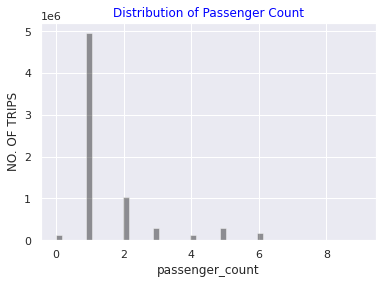

In [ ]:
sns.distplot(df['passenger_count'],kde=False,color='black')
plt.title('Distribution of Passenger Count',color='blue')
plt.ylabel('NO. OF TRIPS')
plt.show()

Here we see that the mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare.

In this analysis our purpose is to predict **fare_amount**.We know that the taxis generally charge a fixed initial fee that is based on**"per km distance"** ***(trip_distance***),**"per minute"**(trip_duration).We have  column of trip_distance  but not a column of trip_duration. But we have **pickup time** and **drop_off time**.So we can find the duration of the trip

In [ ]:
df['tpep_pickup_day']=df['tpep_pickup_datetime'].dt.day_name()
df['tpep_dropoff_day']=df['tpep_dropoff_datetime'].dt.day_name()

We convert the dates into days of the week ,in order to check that which days of the week have more no. of passengers.

In [ ]:
df['tpep_pickup_day'].value_counts()

Friday       1105725
Thursday     1078645
Wednesday    1055788
Saturday     1035833
Tuesday       986366
Monday        895047
Sunday        861971
Name: tpep_pickup_day, dtype: int64

This shows the distribuion of passengers on different days of the week.There may be various reasons as **SUNDAY** is a weekend day thus people go on outings.

In [ ]:
df['tpep_dropoff_day'].value_counts()

Friday       1103311
Thursday     1075813
Wednesday    1054129
Saturday     1035486
Tuesday       984928
Monday        895627
Sunday        870081
Name: tpep_dropoff_day, dtype: int64

This shows that the maximum passengers have availed the taxi on **FRIDAY** and least on **SUNDAY**

The distribution of trip duration with the days of the week is something to look into as well.

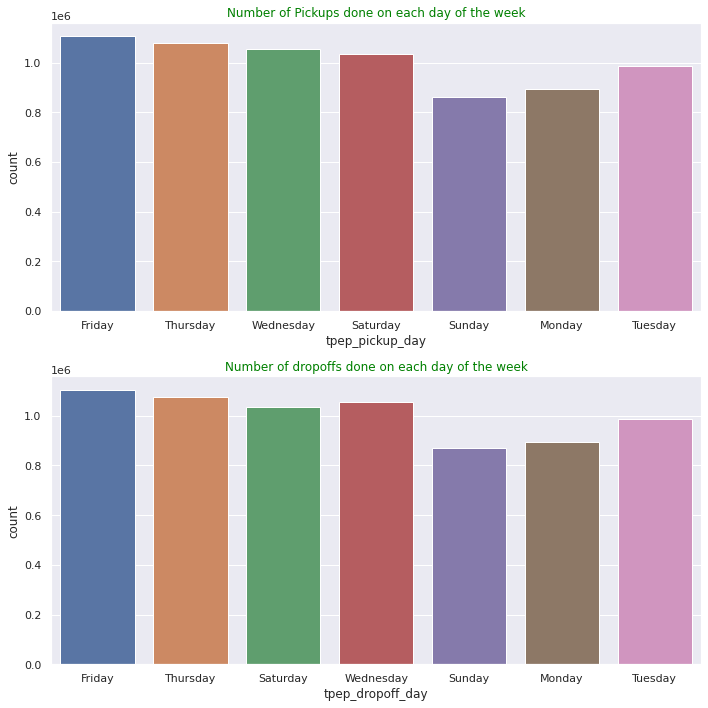

In [ ]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='tpep_pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week',color='green')
sns.countplot(x='tpep_dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week',color='green')
plt.tight_layout()

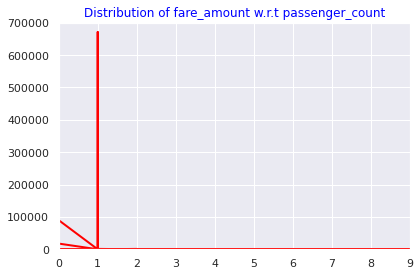

In [ ]:
plt.plot(df['passenger_count'],df['fare_amount'],linewidth=2,color='red')
plt.title('Distribution of fare_amount w.r.t passenger_count',color='blue')
plt.xlim(0,9)
plt.ylim(0,700000)
plt.margins(x=2,y=1)
plt.tight_layout()

[Text(0, 0.5, 'No. of dropoffs'),
 Text(0.5, 0, 'dropoff_hour'),
 Text(0.5, 1.0, 'Distribution of dropoff hours')]

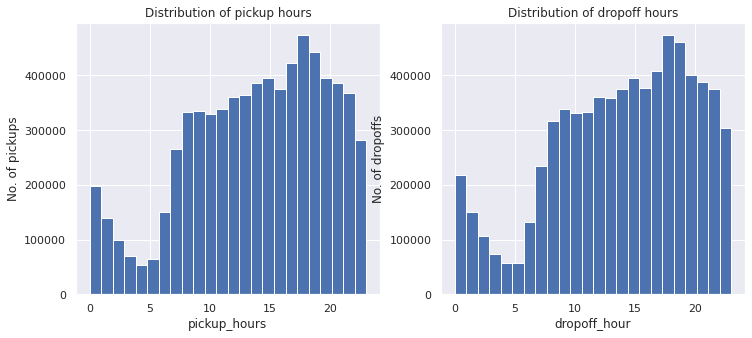

In [ ]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set(title='Distribution of pickup hours',ylabel='No. of pickups',xlabel='pickup_hours')
df['dropoff_hour']=df['tpep_dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set(title='Distribution of dropoff hours',xlabel='dropoff_hour',ylabel='No. of dropoffs')

**This shows DISTRIBUTION OF PICKUPS & DROPOFFS IN 4 PARTS OF A DAY**

The 2 distributions are almost similar and are also aligned with the division of the hours of the day into 4 parts 'MORNING','AFTERNOON','EVENING',LATE NIGHT' and their distribution,with respect to no. ofpickup and dropoffs.



This way we can find a new column of time duration of the trip,using pickup and dropoff time.This column **'duration'** is a series of trip duration in seconds

**Distribution of the stored and forward flag**

In [ ]:
df['store_and_fwd_flag'].value_counts()  #This counts the value of STORE AND FORWARD FLAG i.e Y & N

N    6982876
Y      36499
Name: store_and_fwd_flag, dtype: int64

The **number of N flag is much larger** **as compared to Y flag.** We can see whether they have any relation with the duration of the trip.

**Distribution of the trip distance**

Text(0, 0.5, 'no. of pickups')

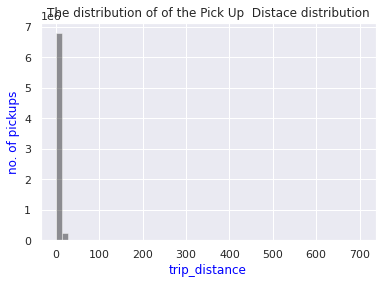

In [ ]:
sns.distplot(df['trip_distance'],kde=False,color='black')
plt.title('The distribution of of the Pick Up  Distace distribution')
plt.xlabel('trip_distance',color='blue')
plt.ylabel('no. of pickups',color='blue')

There are outliers. Lets see the boxplot of this variable.

Text(0.5, 0, 'trip_distance')

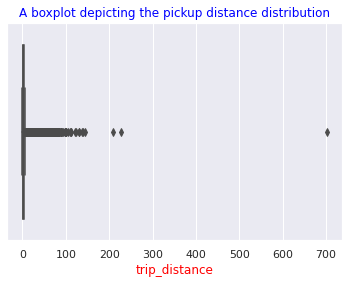

In [ ]:
sns.boxplot(df['trip_distance'], orient='horizontal')
plt.title('A boxplot depicting the pickup distance distribution',color='blue')
plt.xlabel('trip_distance',color='red')

Thus we see there is **only two-three values near 200-300** while all the others are somewhere between **0 and 150**. The ones near **700 ,200-300 are definitely an outlier which must be treated.**

Lets have a look at the 10 largest value of trip_duration.

In [ ]:
print( df['trip_distance'].nlargest(10))

150992     701.50
5722353    226.10
3730068    209.38
3667765    143.47
4968139    138.64
7008104    137.32
686074     130.53
3883334    130.22
6727962    124.29
5561859    120.60
Name: trip_distance, dtype: float64


***THIS VERIFIES THE ABOVE BOXPLOT ***

The largest value is much greater than the 2nd and 3rd largest trip duration value. This might be because of some errors which typically occurs during data collection or this might be a legit data. Since the occurrence of such a huge value is unlikely so its better to drop this row before further analysis.

In [ ]:
df=df[df.trip_distance!=df.trip_distance.max()]

Lets have a look at the distribution of the trip_duration after we have dropped the outlier.

Text(0.5, 1.0, 'Distribution of the pickup distance after the treatment of outliers')

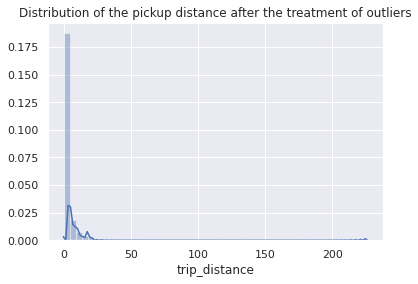

In [ ]:
sns.distplot(df['trip_distance'])
plt.title('Distribution of the pickup distance after the treatment of outliers')

**Distribution of vendor_id**

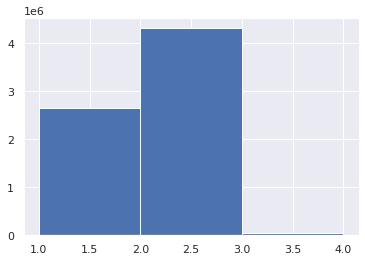

In [ ]:
df['VendorID'].hist(bins=3)

**Conclusion about Trip Distance and the data set:**
Trip Distance varies a lot ranging from metres to more than 700 km
1.Most trips are taken on Friday , Saturday and Thursday

The average duration of a trip is most on Thursday and Friday as trips longer 
than 5 hours are mostly taken in these days

The average distance of trips started in between 100 km and 150 km is the 
largest.

Vendor 2 mostly provides the longer trips


